In [266]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('./Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
data.head()

/Users/shreyagurjar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CAMIS                  DBA       BORO BUILDING            STREET  \
0  41093742          STONE CREEK  Manhattan      140  EAST   27 STREET   
1  40399672  BAGELS & CREAM CAFE     Queens     8002      SURREY PLACE   
2  41089835           BILL'S BAR   Brooklyn     6326          AVENUE N   
3  50057443            VERITABLE  Manhattan     1201           2ND AVE   
4  50001843             RANDOLPH   Brooklyn      104  SOUTH 4TH STREET   

   ZIPCODE       PHONE CUISINE DESCRIPTION INSPECTION DATE  \
0  10016.0  2125321037            American      04/12/2017   
1  11432.0  7189692640              Bakery      01/31/2017   
2  11234.0  7184449644            American      05/01/2019   
3  10065.0  2127530600            American      02/08/2019   
4  11249.0  2122740667            Armenian      08/12/2017   

                                            ACTION  ... RECORD DATE  \
0  Violations were cited in the following area(s).  ...  10/29/2019   
1  Violations were cited in the following area(s).  ...  10/29/2019   
2  Violations were cited in the following area(s).  ...  10/29/2019   
3  Violations were cited in the following area(s).  ...  10/29/2019   
4  Violations were cited in the following area(s).  ...  10/29/2019   

                         INSPECTION TYPE   Latitude  Longitude  \
0       Cycle Inspection / Re-inspection  40.741849 -73.982534   
1       Cycle Inspection / Re-inspection  40.726357 -73.789447   
2  Cycle Inspection / Initial Inspection  40.619592 -73.916356   
3  Cycle Inspection / Initial Inspection  40.763278 -73.962403   
4  Cycle Inspection / Initial Inspection  40.712212 -73.963824   

  Community Board Council District Census Tract        BIN           BBL   NTA  
0           106.0              2.0       6800.0  1018150.0  1.008820e+09  MN21  
1           408.0             24.0     127700.0  4155424.0  4.072270e+09  QN06  
2           318.0             46.0      69800.0  3236374.0  3.083850e+09  BK45  
3           108.0              4.0      11000.0  1043864.0  1.014180e+09  MN31  
4           301.0             34.0      54900.0  3404065.0  3.024430e+09  BK73  

[5 rows x 26 columns]

In [267]:
#get the relevant columns of restaurant name, borough, grade, and coordinates
data_rest = data[['DBA','BORO','GRADE','Latitude','Longitude']]
#rename the columns 
data_rest = data_rest.rename(index=str, columns={'DBA': 'Restaurant','BORO': 'Borough','GRADE':'Grade'})
data_rest.head()

Restaurant    Borough Grade   Latitude  Longitude
0          STONE CREEK  Manhattan     A  40.741849 -73.982534
1  BAGELS & CREAM CAFE     Queens     A  40.726357 -73.789447
2           BILL'S BAR   Brooklyn     A  40.619592 -73.916356
3            VERITABLE  Manhattan   NaN  40.763278 -73.962403
4             RANDOLPH   Brooklyn     A  40.712212 -73.963824

In [268]:
data_rest.shape

(394927, 5)

In [269]:
#drop columns that have NAN
data_rest = data_rest.dropna()

In [270]:
#about 200,000 intances were dropped 
data_rest.shape

(199097, 5)

In [271]:
#check unique health grades in the grades column, we only want A, B, or C 
data_rest['Grade'].unique()

array(['A', 'B', 'C', 'N', 'P', 'Z', 'G'], dtype=object)

In [272]:
#select restaurants that have only A, B, of C grades
data_rest= data_rest.loc[data_rest['Grade'].isin(['A','B','C'])]
data_rest

Restaurant        Borough Grade   Latitude  Longitude
0                      STONE CREEK      Manhattan     A  40.741849 -73.982534
1              BAGELS & CREAM CAFE         Queens     A  40.726357 -73.789447
2                       BILL'S BAR       Brooklyn     A  40.619592 -73.916356
4                         RANDOLPH       Brooklyn     A  40.712212 -73.963824
5                  TRUE COLORS BAR         Queens     A  40.747368 -73.886485
...                            ...            ...   ...        ...        ...
394922   DAIRY QUEEN GRILL & CHILL      Manhattan     A  40.736709 -73.995327
394923           FRANK'S TRATTORIA      Manhattan     A  40.735947 -73.979071
394924           BROOKLYN SHAWARMA       Brooklyn     B  40.682642 -73.962867
394925  INTERNATIONAL HOUSE DINING      Manhattan     A  40.814550 -73.962475
394926               RETRO FITNESS  Staten Island     A  40.527843 -74.233372

[190591 rows x 5 columns]

In [273]:
#remove invalid longitude or latitude
data_rest_long = data_rest.loc[data_rest['Longitude'] != 0]
data_rest_long.shape

(187704, 5)

In [274]:
data_rest_final = data_rest_long.loc[data_rest_long['Latitude'] != 0]
data_rest_final.shape

(187704, 5)

In [275]:
data_rest_final

Restaurant        Borough Grade   Latitude  Longitude
0                      STONE CREEK      Manhattan     A  40.741849 -73.982534
1              BAGELS & CREAM CAFE         Queens     A  40.726357 -73.789447
2                       BILL'S BAR       Brooklyn     A  40.619592 -73.916356
4                         RANDOLPH       Brooklyn     A  40.712212 -73.963824
5                  TRUE COLORS BAR         Queens     A  40.747368 -73.886485
...                            ...            ...   ...        ...        ...
394922   DAIRY QUEEN GRILL & CHILL      Manhattan     A  40.736709 -73.995327
394923           FRANK'S TRATTORIA      Manhattan     A  40.735947 -73.979071
394924           BROOKLYN SHAWARMA       Brooklyn     B  40.682642 -73.962867
394925  INTERNATIONAL HOUSE DINING      Manhattan     A  40.814550 -73.962475
394926               RETRO FITNESS  Staten Island     A  40.527843 -74.233372

[187704 rows x 5 columns]

In [276]:
data_rest_final.to_csv('NYCOpendata_cleaned.csv')

In [11]:
data_rest_final['Borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
data_rest_final = data_rest_final.reset_index(drop=True)
data_rest_final

Restaurant        Borough Grade   Latitude  Longitude
0                      STONE CREEK      Manhattan     A  40.741849 -73.982534
1              BAGELS & CREAM CAFE         Queens     A  40.726357 -73.789447
2                       BILL'S BAR       Brooklyn     A  40.619592 -73.916356
3                         RANDOLPH       Brooklyn     A  40.712212 -73.963824
4                  TRUE COLORS BAR         Queens     A  40.747368 -73.886485
...                            ...            ...   ...        ...        ...
187699   DAIRY QUEEN GRILL & CHILL      Manhattan     A  40.736709 -73.995327
187700           FRANK'S TRATTORIA      Manhattan     A  40.735947 -73.979071
187701           BROOKLYN SHAWARMA       Brooklyn     B  40.682642 -73.962867
187702  INTERNATIONAL HOUSE DINING      Manhattan     A  40.814550 -73.962475
187703               RETRO FITNESS  Staten Island     A  40.527843 -74.233372

[187704 rows x 5 columns]

In [13]:
data_first_50 = data_rest_final[['Restaurant','Latitude','Longitude']][:50]
data_first_50

Restaurant   Latitude  Longitude
0                                STONE CREEK  40.741849 -73.982534
1                        BAGELS & CREAM CAFE  40.726357 -73.789447
2                                 BILL'S BAR  40.619592 -73.916356
3                                   RANDOLPH  40.712212 -73.963824
4                            TRUE COLORS BAR  40.747368 -73.886485
5                        TONY'S FAMOUS PIZZA  40.696003 -73.838480
6         WYNDHAM GARDEN FRESH MEADOWS HOTEL  40.739873 -73.788242
7                            NATALIE'S PIZZA  40.707945 -73.802930
8                        CROWN FRIED CHICKEN  40.692566 -73.939938
9                     CHINA TOKYO RESTAURANT  40.619481 -73.918099
10                            LITTLE COLLINS  40.756918 -73.972066
11                                 NOODLEFAN  40.613018 -74.123583
12           THE JUILLIARD SCHOOL(ROSE CAFE)  40.773735 -73.983865
13                                DESI GALLI  40.742162 -73.982793
14                                   NATHANS  40.683447 -73.975691
15                 AUNTIE GUAN'S KITCHEN 108  40.737593 -73.997434
16                   MARTHA'S COUNTRY BAKERY  40.763445 -73.770908
17                      PD' MARIO RESTAURANT  40.662549 -73.934900
18                                     MALII  40.789457 -73.943270
19  DOMAND'S ITALIAN GOURMET DELI & CATERERS  40.769642 -73.834687
20                          WEST 8 HAPPY WOK  40.578445 -73.976320
21                           SAHARA NEW YORK  40.767537 -73.912036
22                                MCDONALD'S  40.648723 -73.958298
23                      WING GONG RESTAURANT  40.791132 -73.938971
24                              NAGLE BAKERY  40.860746 -73.927023
25                         TRATTORIA CERBONE  40.701536 -73.894844
26                         BIG GAY ICE CREAM  40.707074 -74.003030
27                            PARIS BAGUETTE  40.756156 -73.879543
28       EL GRAND CHEF RESTAURANT & PIZZERIA  40.848954 -73.904590
29                             FLATIRON HALL  40.744158 -73.989913
30                     LUNT FONTANNE THEATER  40.758891 -73.985796
31                                MCDONALD'S  40.879117 -73.871407
32               BUSHWICK GRIND COFFEE HOUSE  40.701535 -73.944333
33                       LA FUSTA RESTAURANT  40.744707 -73.884570
34    ITALIANA CREMOSA PIZZERIA & RESTAURANT  40.687852 -73.833405
35                           PALM RESTAURANT  40.716855 -74.012207
36                            99 FAVOR TASTE  40.717723 -73.992493
37                    JADE ISLAND RESTAURANT  40.576546 -74.169751
38                       KAIETEUR RESTAURANT  40.699576 -73.830696
39                             THE FOOTLIGHT  40.706055 -73.913174
40          RESTAURANT ON THE PLAZA PIZZERIA  40.573579 -74.116822
41                          PIZZA ON THE RUN  40.576707 -73.984067
42                              ARASHI SUSHI  40.655792 -73.915319
43                  GEORGIAN DELI AND BAKERY  40.600848 -73.992060
44                     JUICE PRESS @ EQUINOX  40.714163 -74.009678
45                          WHITESTONE LANES  40.770709 -73.833720
46                          ROYALCOACH DINER  40.872696 -73.854396
47                 MARCY & MYRTLE COFFEE BAR  40.695049 -73.949153
48                                  SAMURICE  40.718714 -74.000924
49                 FU KEE CHINESE RESTAURANT  40.601740 -73.993468

In [14]:
!pip install pyzomato

In [15]:
from pyzomato import Pyzomato
import json

p = Pyzomato('d4f43811f2f25cac0ffeea9a40a60e88')

In [30]:
rest_list = []
for i,row in data_first_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
print(rest_list)

[{'results_found': 32, 'results_start': 0, 'results_shown': 1, 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1}, 'res_id': 16782549}, 'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88', 'id': '16782549', 'name': 'Stone Creek', 'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1', 'location': {'address': '140 East 27th Street 10016', 'locality': 'Kips Bay', 'city': 'New York City', 'city_id': 280, 'latitude': '40.7416100000', 'longitude': '-73.9825200000', 'zipcode': '10016', 'country_id': 216, 'locality_verbose': 'Kips Bay'}, 'switch_to_order_menu': 0, 'cuisines': 'American', 'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)', 'average_cost_for_two': 75, 'price_range': 4, 'currency': '$', 'highlights': ['Credit Card', 'Dinner', 'Lunch', 'Serves Alcohol', 'Private Dining Area Available', 'Nightlife', 'Table booking recommended', 'Indoor Seating', 'Wifi'], 'offers': [], 'o

In [37]:
data_next_1_50 = data_rest_final[['Restaurant','Latitude','Longitude']][50:100]
data_next_1_50

Restaurant   Latitude  Longitude
50                     AMC THEATRES  40.756740 -73.988659
51                       DOG & BONE  40.740021 -73.982289
52              THE PUBLIC NEW YORK  40.722779 -73.991464
53  DESPIERTA CON ENERGIA/HERBALIFE  40.743891 -73.857133
54                              KFC  40.692640 -73.857041
55            KENNEDY FRIED CHICKEN  40.826284 -73.876583
56        MAGLIA ROSA INDUSTRY CITY  40.656383 -74.005539
57                     BIRCH COFFEE  40.764410 -73.967572
58            DOUBLE DUTCH ESPRESSO  40.805920 -73.954255
59           LUCKY THAILAND KITCHEN  40.692584 -73.858037
60   MORGENSTERN'S FINEST ICE CREAM  40.727204 -73.999693
61                       CHADWICK'S  40.621836 -74.031736
62              PRIME PIZZA KITCHEN  40.585577 -74.093005
63                      SOMETHING 1  40.762568 -73.804367
64                      NEW PHOENIX  40.615466 -74.084691
65                 BRICK OVEN BREAD  40.579821 -73.957791
66                  FRAUNCES TAVERN  40.703488 -74.011375
67                           NAGOYA  40.605234 -73.999327
68                     PANERA BREAD  40.577142 -74.164065
69                       MCDONALD'S  40.839991 -73.877118
70                    NOORMAN'S KIL  40.711275 -73.947780
71                             RAKU  40.726937 -73.987473
72        EL NUEVO SANDY RESTAURANT  40.797101 -73.937708
73                  SAKE RESTAURANT  40.599890 -73.990454
74                     LA SLOWTERIA  40.675070 -73.999423
75                        BEST DELI  40.659424 -73.765788
76         FLOWER BROOK MIFEN HOUSE  40.753012 -73.821727
77                            WIBAR  40.774414 -73.877293
78                       TOSCANA 49  40.755644 -73.972279
79                     NEVADA DINER  40.737681 -73.882258
80                JENNY'S ROTI SHOP  40.833632 -73.851468
81                            DUZAN  40.768667 -73.911074
82                      SAL'S PIZZA  40.781449 -73.841413
83          SOL DE QUITO RESTAURANT  40.701723 -73.919127
84    GOLDEN WAY CHINESE RESTAURANT  40.675240 -73.843282
85    ASEA FUSION & YAKITORI LOUNGE  40.645994 -73.998645
86              CROWN FRIED CHICKEN  40.702744 -73.907570
87                      STRIP HOUSE  40.755122 -73.980740
88            LIAN SHENG RESTAURANT  40.637021 -74.007977
89             PARKSIDE COFFEE SHOP  40.655070 -73.961347
90        THE STATION CRAFT CUISINE  40.750812 -73.939906
91                        POLKA DOT  40.726112 -73.952116
92                     MEL'S BURGER  40.771156 -73.956629
93                WHAT A BAGEL CAFE  40.745801 -73.714265
94             OSLO COFFEE ROASTERS  40.713098 -73.962197
95              CROWN GRILL & SALAD  40.669855 -73.909609
96                           SUBWAY  40.835523 -73.920676
97             MCNALLY JACKSON CAFE  40.723490 -73.996039
98                    DRAGON GARDEN  40.875393 -73.879500
99                   KAZZA WINE BAR  40.847602 -73.938348

In [38]:
for i,row in data_next_1_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [39]:
data_next_2_50 = data_rest_final[['Restaurant','Latitude','Longitude']][100:150]
data_next_2_50

Restaurant   Latitude  Longitude
100             TITA'S DONUTS AND COFFEE SHOP  40.850100 -73.905459
101                                   DUNKIN'  40.726074 -73.895050
102                         CHEEKY SANDWICHES  40.715736 -73.991465
103                              ZABKA COFFEE  40.682077 -73.949931
104                      RARE BAR  AND  GRILL  40.745415 -73.992905
105                             M&R FIRE FEST  40.690203 -73.814594
106                             THE TAP HOUSE  40.719221 -73.842327
107                           MULBERRY & VINE  40.715104 -74.010064
108                          BEANOCCHIOS CAFE  40.769342 -73.951937
109                             JENAVIES CAFE  40.833266 -73.827510
110                                   POPEYES  40.632246 -73.887979
111                  OCEAN CHINESE RESTAURANT  40.759610 -73.733903
112                           TRUE COLORS BAR  40.747368 -73.886485
113                                      TANG  40.757850 -73.784593
114                               WONDEE SIAM  40.765095 -73.987755
115     EL SABOR AZOGUENO BAKERY & RESTAURANT  40.752844 -73.866029
116                       CROWN FRIED CHICKEN  40.596003 -73.754110
117                           HIBACHI EXPRESS  40.709922 -74.010240
118                          OCAFE NEW SCHOOL  40.737044 -73.992844
119                          FROST RESTAURANT  40.718204 -73.943536
120                       LITTLE SAIGON PEARL  40.599322 -73.990526
121                                   NAMASTE  40.676745 -73.980218
122                                 STARBUCKS  40.581002 -73.985726
123  EL TINA FISH MARKET & SEAFOOD RESTAURANT  40.864459 -73.918975
124                        BRASSERIE RUHLMANN  40.759198 -73.978335
125                   NEW EVERYBODY'S KITCHEN  40.572232 -74.092954
126                         LE PAIN QUOTIDIEN  40.753259 -73.984379
127                             BROOKLYN CRAB  40.675175 -74.016767
128                        PC'S BAR AND GRILL  40.631502 -74.021797
129                SHUN LEE PALACE RESTAURANT  40.759377 -73.969484
130            THE LITTLE CUPCAKE PASTRY SHOP  40.850035 -73.865623
131                   EL ECONOMICO RESTAURANT  40.879177 -73.904615
132                   CONCORD HILL RESTAURANT  40.715577 -73.944545
133                        KESTE PIZZA & VINO  40.731502 -74.003154
134                        ZOILITA RESTAURANT  40.720559 -73.809238
135                STONE BRIDGE PIZZA & SALAD  40.752446 -73.980535
136                             ROSALIA PIZZA  40.724658 -73.850042
137                              THINK COFFEE  40.752118 -74.001159
138                              CHINA CHALET  40.545467 -74.160291
139                      F & M 99 CENTS PIZZA  40.725580 -73.977765
140                          PAGE PLAZA DINER  40.522322 -74.234960
141                             VEGGIE CASTLE  40.690660 -73.813958
142                         DB BISTRO MODERNE  40.755509 -73.981660
143                                  NOREETUH  40.727365 -73.985442
144                  EL NUEVO ROBLE BILLIARDS  40.838388 -73.912939
145                          BRONX DRAFTHOUSE  40.827925 -73.924675
146                                 LULA BIRD  40.670928 -73.950411
147                VIRGIN ATLANTIC CLUB HOUSE  40.648313 -73.788281
148                             CHAMP GOURMET  40.706173 -74.011250
149                  SANTA ANA DELI & GROCERY  40.702193 -73.919956

In [40]:
for i,row in data_next_2_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [41]:
data_next_3_50 = data_rest_final[['Restaurant','Latitude','Longitude']][150:200]
data_next_3_50

Restaurant   Latitude  Longitude
150                          EL REY MEXICAN RESTAURANT  40.771237 -73.922425
151                                            SOFRITO  40.827111 -73.951960
152                             HOME MADE COOKING CAFE  40.577431 -73.962195
153                                           CHEZ MOI  40.690569 -73.995550
154                       S & A WEST INDIAN RESTAURANT  40.681718 -73.837635
155                               OFF SHORE RESTAURANT  40.629066 -74.028778
156                                       SELAMAT PAGI  40.723049 -73.944582
157                                     HOUSE OF CHENG  40.831552 -73.922275
158                             CHIPOTLE MEXICAN GRILL  40.706859 -74.006990
159                                   BAKER STREET PUB  40.762248 -73.960021
160                               JOE ALLEN RESTAURANT  40.760179 -73.988882
161                                     LIBERTY TAVERN  40.630981 -74.102119
162                          RUBBY PIZZERIA RESTAURANT  40.768792 -73.988776
163                              MARCO POLO RISTORANTE  40.682283 -73.995922
164                                          CRANBERRY  40.748855 -73.939605
165                                        PAPA JOHN'S  40.739597 -73.924912
166                                  WAYPOINT CAFE NYC  40.717251 -73.989813
167                                        JOY KITCHEN  40.661548 -73.986037
168                                 BENNY'S BRICK OVEN  40.618322 -73.957078
169                                             EGGLOO  40.715563 -73.999466
170                                            MALLY'S  40.703520 -73.926630
171                                      JAVA DAY CAFE  40.762828 -73.805334
172                                   AJI SUSHI & THAI  40.676594 -73.980319
173                                  QUICK GRILL JAPAN  40.613112 -74.158639
174                                             RUZANA  40.622466 -74.026232
175                       ISABELA'S MEXICAN RESTAURANT  40.649688 -74.009233
176                            EL CASTILLO DE JAGUA II  40.714574 -73.982083
177                                         NICE PIZZA  40.687484 -73.956951
178                       ELSA LA REYNA DEL CHICHARRON  40.843762 -73.937802
179                                        COYOTE UGLY  40.728441 -73.984677
180                                    PIO PIO EXPRESS  40.779707 -73.947290
181                                    BKLYN PIZZA CO.  40.689084 -73.923949
182                                            DUNKIN'  40.750195 -73.870048
183                                        BEHAN'S PUB  40.898581 -73.867387
184                          NAZCA PERUVIAN RESTAURANT  40.676550 -73.843683
185                                TERRACE ON THE PARK  40.744027 -73.851810
186                                     THE DOLAR SHOP  40.760903 -73.832871
187                                        KIM ESS DOO  40.631548 -73.995720
188                                    MARIO'S PIZZA 2  40.824060 -73.893103
189                                            TAMAQUA  40.594272 -73.930063
190                                            CHIFLEZ  40.748961 -73.871169
191                                 QUEZADA RESTAURANT  40.640853 -73.956001
192                                                KOI  40.753053 -73.983892
193                         DORO'S JAMAICAN RESTAURANT  40.829234 -73.916286
194  FASHION INSTITUTE OF TECHNOLOGY DAVID DUBINSKY...  40.747120 -73.994991
195                                       TEMPLE COURT  40.711386 -74.006666
196                                  MOTORINO PIZZERIA  40.710389 -73.963605
197                            SEIS VECINOS RESTAURANT  40.815220 -73.903396
198                                  MY NY BAKERY CAFE  40.788324 -73.949121
199                     NUTRICION FAMILIAR (Herbalife)  40.750455 -73.877601

In [42]:
for i,row in data_next_3_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [43]:
data_next_4_50 = data_rest_final[['Restaurant','Latitude','Longitude']][200:250]
data_next_4_50

Restaurant   Latitude  Longitude
200                      MOONSTRUCK (IN BELLEVUE)  40.739166 -73.976862
201                                   ERIN'S ISLE  40.786870 -73.807784
202                                     FINE TIME  40.700811 -73.929987
203                       DUNKIN', BASKIN ROBBINS  40.746242 -73.979386
204                           EL REY DE LOS TACOS  40.744544 -73.915390
205             EL GUANACO RESTAURANT & PUPUSERIA  40.848167 -73.937780
206                                        MANGIA  40.756919 -73.976285
207                                   RED LOBSTER  40.869509 -73.826620
208                       CHINA MOON OPEN KITCHEN  40.590794 -73.991856
209                               BETWEEN THE BUN  40.692771 -73.816076
210                              INSOMNIA COOKIES  40.783398 -73.978125
211                       GREAT FLAVOR RESTAURANT  40.670480 -73.929071
212                                BARMASA / MASA  40.767808 -73.982267
213                           NURNBERGER BIERHAUS  40.634729 -74.109572
214                                    APPLEBEE'S  40.755452 -73.922783
215                      MEI YU SPRING RESTAURANT  40.712558 -73.997053
216                 THE ORIGINAL PIZZA OF 4TH AVE  40.635092 -74.023311
217              JOHNNY'S RESTAURANT BAR & LOUNGE  40.678339 -73.831907
218                                 FORTY CARROTS  40.779032 -73.982004
219                        ANGIOLINA'S RESTAURANT  40.838527 -73.918895
220                              NTK LUNCHEONETTE  40.708787 -73.863402
221                                    MCDONALD'S  40.781663 -73.829973
222                            BLUE BOTTLE COFFEE  40.760114 -73.975143
223                                   RE: SOURCES  40.762956 -73.983073
224                                 MILK BAR/FUKU  40.704631 -74.006694
225                                    THE SKINNY  40.721681 -73.988391
226                               HOUSE OF INASAL  40.746084 -73.898545
227                                   3 GUYS GYRO  40.706236 -73.943034
228                         RED STAR CHINESE FOOD  40.799009 -73.942572
229                                     SUSHI JUN  40.757595 -73.969452
230                       WOODSIDE RAINBOW BAKERY  40.745438 -73.903443
231                                  COFFEE TOSSY  40.740537 -73.922775
232                              BAGUETTE EXPRESS  40.624510 -73.962200
233                            LIBERTY GRANT CAFE  40.678845 -73.865976
234                        LITTLE CHOC APOTHECARY  40.711938 -73.957310
235                                   SHAKE SHACK  40.682731 -73.976510
236                      NEW CHINATOWN RESTAURANT  40.720365 -73.978459
237                                     FEEL GOOD  40.740552 -73.917333
238  ST REGIS NEW YORK - 20TH FLOOR ROOF BALLROOM  40.761552 -73.974681
239                                   BONDI SUSHI  40.744863 -73.987766
240                                  PRIME AVENUE  40.666083 -73.942492
241                                         Azuri  40.764840 -73.990213
242                                 MTSKHETA CAFE  40.596933 -73.985597
243                                  PIZZA PETE'S  40.786117 -73.972451
244                                     COFFEE RX  40.635589 -74.026085
245                   NEW ERA RESTAURANT & LOUNGE  40.665670 -73.931430
246                              FAROS RESTAURANT  40.642677 -73.979731
247                                           JOE  40.733193 -74.000599
248                                DA VINCI PIZZA  40.703461 -74.010030
249                 DAISY'S PIZZA WINGS & BURGERS  40.817142 -73.897641

In [44]:
for i,row in data_next_4_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [51]:
data_next_5_50 = data_rest_final[['Restaurant','Latitude','Longitude']][250:300]
data_next_5_50

Restaurant   Latitude  Longitude
250                               ARCHESTRATUS  40.732948 -73.955463
251                             APNAR PHARMACY  40.710063 -73.794610
252                                 FRESH & CO  40.755055 -73.998787
253       NEW GOLDEN EMPIRE CHINESE RESTAURANT  40.826056 -73.943321
254                                LIBERTY BAR  40.677665 -73.828758
255                          LA BELLA MARIELLA  40.715255 -73.901323
256           P & M CLASSIC PIZZA & RESTAURANT  40.826181 -73.946895
257                                   DOMINO'S  40.755033 -73.965320
258                        GRAMERCY  ALE HOUSE  40.737896 -73.983834
259                        CAFE CON PAN BAKERY  40.642768 -74.012727
260                             THE BEERKEEPER  40.745597 -73.906283
261                               OLIVE GARDEN  40.865905 -73.830430
262                                TASTY GRILL  40.788250 -73.813601
263                                SMASHBURGER  40.889958 -73.820071
264                                    DUNKIN'  40.643649 -74.077434
265                                  1080 BREW  40.694618 -73.902417
266                       RED BOWL NOODLE SHOP  40.758442 -73.829600
267                                 CAFE VOLNA  40.575579 -73.962973
268                               HUDSON HOUND  40.736152 -74.005911
269                            CHICKEN HOT POT  40.757558 -73.822560
270             A TASTE OF SHANGHAI RESTAURANT  40.759535 -73.832254
271                               L.A. BURRITO  40.702256 -73.928445
272                        POST BILLIARDS CAFE  40.864912 -73.919058
273       LINDA AZOGUENITA BAKERY & RESTAURANT  40.743845 -73.855210
274               SILHOUETTE RESTAURANT LOUNGE  40.881116 -73.903209
275                       HUDSON BAR AND BOOKS  40.738655 -74.005499
276           DAVIDOVICH BAKERY/BLUEMOON HOTEL  40.718552 -73.990000
277                            LUCIANO'S PIZZA  40.848204 -73.856037
278               SASSY'S SPECIALTY SANDWICHES  40.710431 -73.958999
279                               MINHUI SNACK  40.637230 -74.011317
280                                  KASHMIR 9  40.755071 -73.995062
281                       MIKE'S UNICORN DINER  40.607389 -74.160675
282                      THE JAGUAR RESTAURANT  40.793570 -73.945292
283                                     ROCCOS  40.742001 -73.997182
284                            THE SMOKE HOUSE  40.691791 -73.761902
285                   Legends Bar & Restaurant  40.832515 -73.869716
286                         TAVARES RESTAURANT  40.679237 -73.885459
287                              BREADS BAKERY  40.753069 -73.983881
288                                 CAFE MANNA  40.737093 -73.992123
289                                   THAI POT  40.724831 -73.850211
290                               GINO'S PIZZA  40.625950 -74.134450
291                                 MCDONALD'S  40.719801 -73.845027
292                                 JUICY MAMA  40.670011 -73.933776
293                                MATSU SUSHI  40.765687 -73.918803
294                              OSCAR'S PLACE  40.731826 -74.006589
295                                PAZZA NOTTE  40.763463 -73.977828
296                                    SIP SAK  40.754430 -73.968829
297                              ASCENT LOUNGE  40.767808 -73.982267
298                                     DUKE'S  40.747683 -73.976704
299  MBJ CAFETERIA/LAGUARDIA COMMUNITY COLLEGE  40.744895 -73.935022

In [52]:
for i,row in data_next_5_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [53]:
data_next_6_50 = data_rest_final[['Restaurant','Latitude','Longitude']][300:350]
data_next_6_50

Restaurant   Latitude  Longitude
300                     COZY COTTAGE RESTAURANT  40.886127 -73.827575
301                                      SHOGUN  40.718379 -73.837141
302                                      PEARLS  40.795805 -73.969099
303                   LAS MARGARITAS RESTAURANT  40.633379 -74.027014
304                                 BUTTER LANE  40.726407 -73.984374
305                        EMPLOYEE'S CAFETERIA  40.704629 -73.917698
306                         M. WELLS STEAKHOUSE  40.748667 -73.942323
307                                 IL BRIGANTE  40.707326 -74.002532
308                             THE RICE NOODLE  40.729254 -74.001404
309                    BASCOM CATERING & EVENTS  40.818212 -73.890898
310                                    BONAFINI  40.657101 -73.960203
311                                TEDDY'S CAFE  40.824258 -73.842951
312                     BEANS AND VINES EXPRESS  40.866450 -73.924645
313                             ALICE'S TEA CUP  40.778279 -73.978765
314                               PANDA KITCHEN  40.673463 -73.791341
315             PASTARIFIC PIZZA AND RESTAURANT  40.854047 -73.899211
316                             THE CORNER CAFE  40.743414 -73.992440
317                                    DIVINO'S  40.650529 -73.837747
318                 RUBIROSA PIZZA & RISTORANTE  40.722678 -73.995988
319                           21 HOME'S KITCHEN  40.739662 -73.989142
320       GOLDEN KRUST CARIBBEAN BAKERY & GRILL  40.576813 -73.982930
321                           AZOGUENITA BAKERY  40.752773 -73.864185
322                          HAN BAT RESTAURANT  40.749869 -73.985899
323                            MING KEE KITCHEN  40.718396 -73.994665
324                                 BAGELS DELI  40.730635 -73.810866
325                             RAINBOW FALAFEL  40.737315 -73.990809
326                            YONG KANG STREET  40.609929 -73.922282
327                        CUISINE BY CLAUDETTE  40.578768 -73.836619
328                     RESTAURANT ON 58 ST INC  40.637082 -74.009108
329                       BROOKLYN BEET COMPANY  40.633384 -74.026989
330                                      LEGEND  40.777931 -73.980018
331                                   STARBUCKS  40.705885 -74.007181
332                        HUNGRY BURRITO TACOS  40.701364 -73.905242
333                         COLD STONE CREAMERY  40.735143 -73.875284
334                     CHI'S TASTE OF ORIENTAL  40.664790 -73.993526
335  VETERANS OF FOREIGN WARS POST #107 CANTEEN  40.598102 -73.931013
336                     DUNKIN', BASKIN ROBBINS  40.847393 -73.912577
337                        FLATIRON COFFEE SHOP  40.648313 -73.788281
338                                  MCDONALD'S  40.777836 -73.954686
339                                    DOMINO'S  40.672515 -73.891563
340                                  BAGEL TALK  40.782152 -73.979060
341                                    THE CLUB  40.760711 -73.972642
342                                        BOKA  40.729259 -73.989216
343                                BLEND LOUNGE  40.695403 -73.820688
344                                     AQUAVIT  40.760711 -73.972642
345                                 IDEA COFFEE  40.744586 -73.987373
346                                 LEO'S PIZZA  40.575640 -73.993614
347                      MIDNIGHT EXPRESS DINER  40.779615 -73.950485
348                   LATIN AMERICAN RESTAURANT  40.744108 -73.989751
349                                      SUBWAY  40.587326 -73.953980

In [54]:
for i,row in data_next_6_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [55]:
data_next_7_50 = data_rest_final[['Restaurant','Latitude','Longitude']][400:450]
data_next_7_50

Restaurant   Latitude  Longitude
400                    AUNTIE ANNE'S / CINNABON  40.816255 -73.917311
401                       PIONEERS BAR & LOUNGE  40.747114 -73.991190
402                                   OK CANAAN  40.751984 -73.826484
403                             JEMZ RESTAURANT  40.671057 -73.939643
404             FORT WASHINGTON BAKERY AND DELI  40.851011 -73.938695
405                                        DING  40.760448 -73.985655
406                                     GRAYSON  40.723459 -73.988275
407                                Loring Place  40.732682 -73.997355
408                          LIBERTY GRANT CAFE  40.678845 -73.865976
409                                   MR WASABI  40.762200 -73.770309
410                                   STARBUCKS  40.595614 -74.000090
411                       CAMPAGNOLA RESTAURANT  40.768926 -73.955161
412                                  PAPPA RICH  40.759478 -73.832243
413                                  LE BARATIN  40.735018 -74.000170
414        GOLDEN CHOPSTICKS CHINESE RESTAURANT  40.671944 -73.957494
415                    FUJI JAPANESE RESTAURANT  40.765629 -73.982423
416         MITZ (MELLOW YELLOW COFFEE & VIBES)  40.779120 -73.947745
417                                     DUNKIN'  40.714068 -73.950989
418                                   STARBUCKS  40.691298 -73.984393
419                         CHOKOLAT PATISSERIE  40.812817 -73.960391
420                                BOSTON PIZZA  40.759658 -73.920449
421                          FLATBUSH SOUL FOOD  40.650848 -73.958841
422            GARDEN COURT CAFE (ASIA SOCIETY)  40.770025 -73.964594
423                   LAS SERRANITAS RESTAURANT  40.752574 -73.867047
424                           THE JOYCE THEATER  40.742750 -74.000346
425                              MALAYSIA GRILL  40.799496 -73.967562
426                             LEOS RESTAURANT  40.703413 -73.926439
427                FRIED DUMPLING JIE JIE SHENG  40.760279 -73.826458
428                            NUM PANG KITCHEN  40.750579 -73.976111
429                    US FRIED CHICKEN & PIZZA  40.657201 -73.950248
430                                     DUNKIN'  40.587179 -74.103820
431                                     SUMMERS  40.727649 -74.000336
432                               POLLO CAMPERO  40.829102 -73.875913
433          PUSH FITNESS CLUB OF FRESH MEADOWS  40.729251 -73.780955
434                              BREAD & BUTTER  40.743792 -73.983721
435                                 VILLA PIZZA  40.875565 -73.887336
436                      CHIPOTLE MEXICAN GRILL  40.694113 -73.991832
437                              BROADWAY PIZZA  40.620825 -74.025140
438                        BURGER KING, POPEYES  40.862358 -73.896429
439                                   SAIGUETTE  40.799072 -73.962968
440                              LENNY'S BAGELS  40.796050 -73.970771
441                           LE PAIN QUOTIDIEN  40.766405 -73.979408
442              JOYCE'S WEST INDIES RESTAURANT  40.642149 -73.929115
443                                    BOQUERIA  40.755431 -73.989536
444              SUSANO'S PIZZERIA & RESTAURANT  40.703131 -73.908226
445                        BURGER KING, POPEYES  40.721651 -73.803947
446                               MIKE'S DONUTS  40.633948 -74.020821
447                BIG AL'S CHICAGO STYLE PIZZA  40.540620 -74.147435
448                                    LA FLACA  40.716285 -73.987822
449  HILTON GARDEN INN- MANHATTAN- MIDTOWN EAST  40.756879 -73.969423

In [56]:
for i,row in data_next_7_50.iterrows():
    q = row['Restaurant']
    lat = row['Latitude']
    lon= row['Longitude']
    restaurant = p.search(q=q,
                        lat=lat,
                        lon=lon,
                        radius=5,
                        count=1)
    rest_list.append(restaurant)
rest_list

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [57]:
with open('restlists.json', 'w') as fp:
    json.dump(rest_list, fp)

In [2]:
import pandas as pd

In [3]:
import json

In [4]:
with open('restlists.json') as json_file:
    all_rest = json.load(json_file)

In [5]:
columns=['Latitude','Longitude','Restaurant','aggregate_rating','votes', 'establishment']

In [6]:
all_restpd = pd.DataFrame(columns=columns)

In [7]:
all_rest

[{'results_found': 32,
  'results_start': 0,
  'results_shown': 1,
  'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
       'takeaway': -1},
      'res_id': 16782549},
     'apikey': 'd4f43811f2f25cac0ffeea9a40a60e88',
     'id': '16782549',
     'name': 'Stone Creek',
     'url': 'https://www.zomato.com/new-york-city/stone-creek-kips-bay?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
     'location': {'address': '140 East 27th Street 10016',
      'locality': 'Kips Bay',
      'city': 'New York City',
      'city_id': 280,
      'latitude': '40.7416100000',
      'longitude': '-73.9825200000',
      'zipcode': '10016',
      'country_id': 216,
      'locality_verbose': 'Kips Bay'},
     'switch_to_order_menu': 0,
     'cuisines': 'American',
     'timings': '4 PM to 4 AM (Mon-Fri),11 AM to 4 AM (Sat-Sun)',
     'average_cost_for_two': 75,
     'price_range': 4,
     'currency': '$',
     'highlights': ['Credit Card',
      'Dinner',
      'Lunch

In [8]:
for restaurantSet in all_rest[:325]:
    restaurants = restaurantSet['restaurants']
    for restaurant in restaurants:
        singleRow = [restaurant['restaurant']['location']['latitude'],
               restaurant['restaurant']['location']['longitude'],      
               restaurant['restaurant']['name'],
               restaurant['restaurant']['user_rating']['aggregate_rating'],
               restaurant['restaurant']['user_rating']['votes'],
               restaurant['restaurant']['establishment']]
                
        newRow = pd.Series(singleRow, index=columns)
        all_restpd = all_restpd.append(newRow, ignore_index=True)

all_restpd.index.name = 'id'
all_restpd

Latitude       Longitude                              Restaurant  \
id                                                                           
0    40.7416100000  -73.9825200000                             Stone Creek   
1    40.5220200000  -74.5206900000                         Zee Best Bagels   
2    40.5378555000  -74.5233541000                     Jersey's Sports Bar   
3    40.7120096000  -73.9634612000                       Randolph Brooklyn   
4    40.5378555000  -74.5233541000                     Jersey's Sports Bar   
..             ...             ...                                     ...   
255  40.4919780000  -74.4712840000  Caribbean Palace Restaurant & Catering   
256  40.4865538000  -74.4692107000                            La Fe Bakery   
257  40.7500194444  -73.9863138889                                 Han Bat   
258  40.6086500000  -73.9735555556                   New Ming Hing Kitchen   
259  40.7643777778  -73.8842305556                   Airport Bagels & Deli   

    aggregate_rating votes    establishment  
id                                           
0                2.8     4  [Casual Dining]  
1                  0     1               []  
2                3.2     1               []  
3                  0     1  [Casual Dining]  
4                3.2     1               []  
..               ...   ...              ...  
255              3.3     5               []  
256              3.2     2         [Bakery]  
257              3.6    30  [Casual Dining]  
258                0     0    [Quick Bites]  
259                0     0           [Deli]  

[260 rows x 6 columns]

In [12]:
all_restpd['aggregate_rating'].value_counts()

0      132
3.3     34
3.2     24
3.6     12
3.9      8
3.7      8
3.5      7
3.4      6
3.1      5
4.0      4
2.8      4
3.8      4
4.1      2
4.2      2
4.3      1
4.5      1
4.4      1
2.9      1
2.7      1
3.0      1
2.6      1
4.7      1
Name: aggregate_rating, dtype: int64

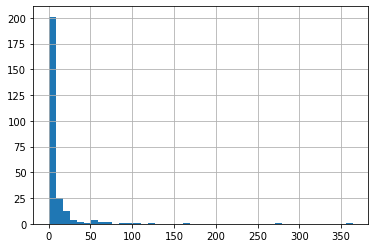

In [31]:
s = all_restpd['votes'].astype(int)

s.hist(bins=len(s.unique()))


In [27]:
all_restpd.to_csv("zomato_api.csv")

In [242]:
all_restpd['Latitude']= all_restpd['Latitude'].astype(float)
all_restpd['Longitude']= all_restpd['Longitude'].astype(float)
all_restpd['Restaurant']= all_restpd['Restaurant'].astype(str)

In [243]:
decimals = pd.Series([4, 4], index=['Latitude', 'Longitude'])
all_restpd = all_restpd.round(decimals)

In [244]:
decimals_2 = pd.Series([4, 4], index=['Latitude', 'Longitude'])
data_rest_final = data_rest_final.round(decimals)

In [252]:
df1 = data_rest_final.merge(all_restpd, on=['Longitude', 'Latitude'], how='left')
#df1 = df1[(data_rest_final.Latitude == all_restpd.Latitude_key) & (data_rest_final.Longitude == all_restpd.Longitude_key)]
df1

Restaurant_x        Borough Grade  Latitude  Longitude  \
0                      STONE CREEK      Manhattan     A   40.7418   -73.9825   
1              BAGELS & CREAM CAFE         Queens     A   40.7264   -73.7894   
2                       BILL'S BAR       Brooklyn     A   40.6196   -73.9164   
3                         RANDOLPH       Brooklyn     A   40.7122   -73.9638   
4                  TRUE COLORS BAR         Queens     A   40.7474   -73.8865   
...                            ...            ...   ...       ...        ...   
187699   DAIRY QUEEN GRILL & CHILL      Manhattan     A   40.7367   -73.9953   
187700           FRANK'S TRATTORIA      Manhattan     A   40.7359   -73.9791   
187701           BROOKLYN SHAWARMA       Brooklyn     B   40.6826   -73.9629   
187702  INTERNATIONAL HOUSE DINING      Manhattan     A   40.8145   -73.9625   
187703               RETRO FITNESS  Staten Island     A   40.5278   -74.2334   

       Restaurant_y aggregate_rating votes establishment  
0               NaN              NaN   NaN           NaN  
1               NaN              NaN   NaN           NaN  
2               NaN              NaN   NaN           NaN  
3               NaN              NaN   NaN           NaN  
4               NaN              NaN   NaN           NaN  
...             ...              ...   ...           ...  
187699          NaN              NaN   NaN           NaN  
187700          NaN              NaN   NaN           NaN  
187701          NaN              NaN   NaN           NaN  
187702          NaN              NaN   NaN           NaN  
187703          NaN              NaN   NaN           NaN  

[187704 rows x 9 columns]

In [253]:
df1= df1.dropna()

In [254]:
df1 = df1.reset_index(drop=True)
df1

Restaurant_x    Borough Grade  Latitude  Longitude  \
0        LA FUSTA RESTAURANT     Queens     B   40.7447   -73.8846   
1                   NOREETUH  Manhattan     A   40.7274   -73.9854   
2                  KASHMIR 9  Manhattan     A   40.7551   -73.9951   
3    THE SPOT KARAOKE LOUNGE  Manhattan     A   40.7478   -73.9871   
4        LA FUSTA RESTAURANT     Queens     B   40.7447   -73.8846   
..                       ...        ...   ...       ...        ...   
171          LANDSDOWNE ROAD  Manhattan     A   40.7606   -73.9948   
172                  PIO PIO  Manhattan     A   40.7606   -73.9948   
173                     BARO  Manhattan     A   40.7478   -73.9871   
174                     BARO  Manhattan     B   40.7478   -73.9871   
175                   K TOWN  Manhattan     B   40.7478   -73.9871   

                    Restaurant_y aggregate_rating votes    establishment  
0                       La Fusta              3.9    16  [Casual Dining]  
1                       Noreetuh              3.3     9  [Casual Dining]  
2    Kashmir Cuisine of Pakistan              3.7     7  [Casual Dining]  
3                          WABar                0     1            [Bar]  
4                       La Fusta              3.9    16  [Casual Dining]  
..                           ...              ...   ...              ...  
171                    Pio Pio 8              4.4   106  [Casual Dining]  
172                    Pio Pio 8              4.4   106  [Casual Dining]  
173                        WABar                0     1            [Bar]  
174                        WABar                0     1            [Bar]  
175                        WABar                0     1            [Bar]  

[176 rows x 9 columns]

In [256]:
df1.Borough.value_counts()

Manhattan    117
Queens        30
Brooklyn      21
Bronx          8
Name: Borough, dtype: int64

In [182]:
df1.to_excel("output.xlsx")

In [234]:
df2 = df1.drop_duplicates(subset='Restaurant_x',keep='first')
df2

Restaurant_x    Borough Grade  Latitude  Longitude  \
0                   LA FUSTA RESTAURANT     Queens     B   40.7447   -73.8846   
1                              NOREETUH  Manhattan     A   40.7274   -73.9854   
2                             KASHMIR 9  Manhattan     A   40.7551   -73.9951   
3               THE SPOT KARAOKE LOUNGE  Manhattan     A   40.7478   -73.9871   
5                      TURNTABLE LP BAR  Manhattan     A   40.7478   -73.9871   
6                     KOSHER BAGEL HOLE   Brooklyn     A   40.6251   -73.9620   
7                 NEW TASTE OF CHINA NY     Queens     A   40.7447   -73.8846   
8                                PASTIS  Manhattan     A   40.7394   -74.0070   
11                        SPACE BILLARD  Manhattan     A   40.7478   -73.9871   
13                                 BARO  Manhattan     A   40.7478   -73.9871   
14                     DI FARA PIZZERIA   Brooklyn     A   40.6251   -73.9620   
19                              1 DOZEN   Brooklyn     A   40.6616   -73.9860   
20                              PIO PIO  Manhattan     A   40.7606   -73.9948   
22                             NUNOODLE  Manhattan     A   40.7274   -73.9854   
23                               K TOWN  Manhattan     A   40.7478   -73.9871   
27               THREE GUY'S RESTAURANT  Manhattan     A   40.7740   -73.9638   
35                         MIRACALI III     Queens     A   40.7447   -73.8846   
48                      LANDSDOWNE ROAD  Manhattan     A   40.7606   -73.9948   
52   KENNEDY'S FRIED CHICKEN & BISCUITS      Bronx     A   40.8575   -73.8911   
60                    SWEET  GENERATION  Manhattan     A   40.7274   -73.9854   
65                             DUBUMARU  Manhattan     A   40.7478   -73.9871   
159                       SPACE KARAOKE  Manhattan     A   40.7478   -73.9871   

                    Restaurant_y aggregate_rating votes    establishment  
0                       La Fusta              3.9    16  [Casual Dining]  
1                       Noreetuh              3.3     9  [Casual Dining]  
2    Kashmir Cuisine of Pakistan              3.7     7  [Casual Dining]  
3                          WABar                0     1            [Bar]  
5                          WABar                0     1            [Bar]  
6               Baguette Express                0     0    [Quick Bites]  
7                       La Fusta              3.9    16  [Casual Dining]  
8                      Feel Food                0     0    [Quick Bites]  
11                         WABar                0     1            [Bar]  
13                         WABar                0     1            [Bar]  
14              Baguette Express                0     0    [Quick Bites]  
19                   Joy Kitchen              3.2     3    [Quick Bites]  
20                     Pio Pio 8              4.4   106  [Casual Dining]  
22                      Noreetuh              3.3     9  [Casual Dining]  
23                         WABar                0     1            [Bar]  
27             3 Guys Restaurant              3.6    31  [Casual Dining]  
35                      La Fusta              3.9    16  [Casual Dining]  
48                     Pio Pio 8              4.4   106  [Casual Dining]  
52         Kennedy Fried Chicken                0     0      [Fast Food]  
60                      Noreetuh              3.3     9  [Casual Dining]  
65                         WABar                0     1            [Bar]  
159                        WABar                0     1            [Bar]

In [236]:
df2.to_csv("zomato_output.csv")